In [1]:
library(ggplot2)

# Error normalizado

In [2]:
U01=c(0.00066,0.00066,0.00067,0.00069,0.00075,0.00087,0.00114,0.00128,0.00161,0.00195)
e01=c(0.0001,0.0001,0.0001,-0.0001,0.0004,0.0008,0.0001,0.0005,0.0004,0.0007)
U02=c(0.00044,0.00045,0.00045,0.00046,0.00050,0.00057,0.00073,0.00081,0.00101,0.00121)
e02=c(-0.0002,0.0002,0.0003,-0.0003,-0.0001,-0.0001,-0.0006,-0.0001,0.0004,0.0003)
punto=c(0.01,10,20,50,100,150,250,300,400,500)

In [3]:
en=(e01-e02)/sqrt(U01**2+U02**2)

In [4]:
df=data.frame(punto,en) 

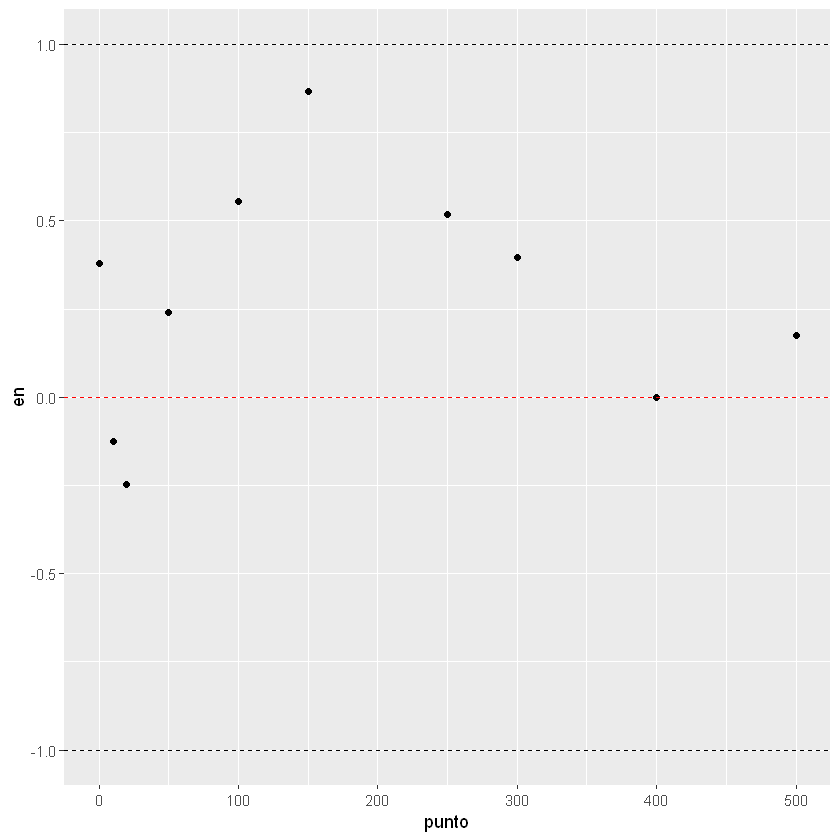

In [5]:
ggplot(df, aes(x = punto, y = en)) +
  geom_point()+ 
  geom_hline(yintercept = 1, linetype = "dashed")+
  geom_hline(yintercept = -1, linetype = "dashed")+
  geom_hline(yintercept = 0, linetype = "dashed",color="red")

# Diseño de experimentos

In [6]:
df=data.frame(matrix(ncol = 4, nrow = 0))
colnames(df)=c('Juego', 'Balanza', 'Punto',"Indicación")

In [7]:
for (i in c("JP-01","JP-02")){
    for (j in c("Analítica","Granataria")){
        for (k in c(0.01,200,500)){
            df[nrow(df)+1,]=c(i,j,k,0)
            }
        }
    }

In [8]:
df[,ncol(df)]=c(0.0098,200.0009,499.9997,0.00,199.98,499.96,0.0099,200.0007,500.0000,0.00,199.99,499.97)

In [9]:
df

Juego Balanza    Punto Indicación
1  JP-01 Analítica  0.01    0.0098  
2  JP-01 Analítica  200   200.0009  
3  JP-01 Analítica  500   499.9997  
4  JP-01 Granataria 0.01    0.0000  
5  JP-01 Granataria 200   199.9800  
6  JP-01 Granataria 500   499.9600  
7  JP-02 Analítica  0.01    0.0099  
8  JP-02 Analítica  200   200.0007  
9  JP-02 Analítica  500   500.0000  
10 JP-02 Granataria 0.01    0.0000  
11 JP-02 Granataria 200   199.9900  
12 JP-02 Granataria 500   499.9700

In [10]:
str(df)
attach(df)

'data.frame':	12 obs. of  4 variables:
 $ Juego     : chr  "JP-01" "JP-01" "JP-01" "JP-01" ...
 $ Balanza   : chr  "Analítica" "Analítica" "Analítica" "Granataria" ...
 $ Punto     : chr  "0.01" "200" "500" "0.01" ...
 $ Indicación: num  9.8e-03 2.0e+02 5.0e+02 0.0 2.0e+02 ...


In [11]:
Balanza <- factor(Balanza)
Juego <- factor(Juego)
Punto <- factor(Punto)

Warning message in anova.lm(df.lm):
"ANOVA F-tests on an essentially perfect fit are unreliable"


Df Sum Sq       Mean Sq      F value      Pr(>F)      
Balanza       1  1.220083e-03 1.220083e-03 1.446882e+02 6.840577e-03
Juego         1  3.400333e-05 3.400333e-05 4.032414e+00 1.824073e-01
Punto         2  5.066219e+05 2.533109e+05 3.003984e+10 3.328913e-11
Balanza:Juego 1  3.267000e-05 3.267000e-05 3.874296e+00 1.878832e-01
Balanza:Punto 2  3.411017e-04 1.705508e-04 2.022542e+01 4.711333e-02
Juego:Punto   2  1.653167e-05 8.265833e-06 9.802352e-01 5.049905e-01
Residuals     2  1.686500e-05 8.432500e-06           NA           NA

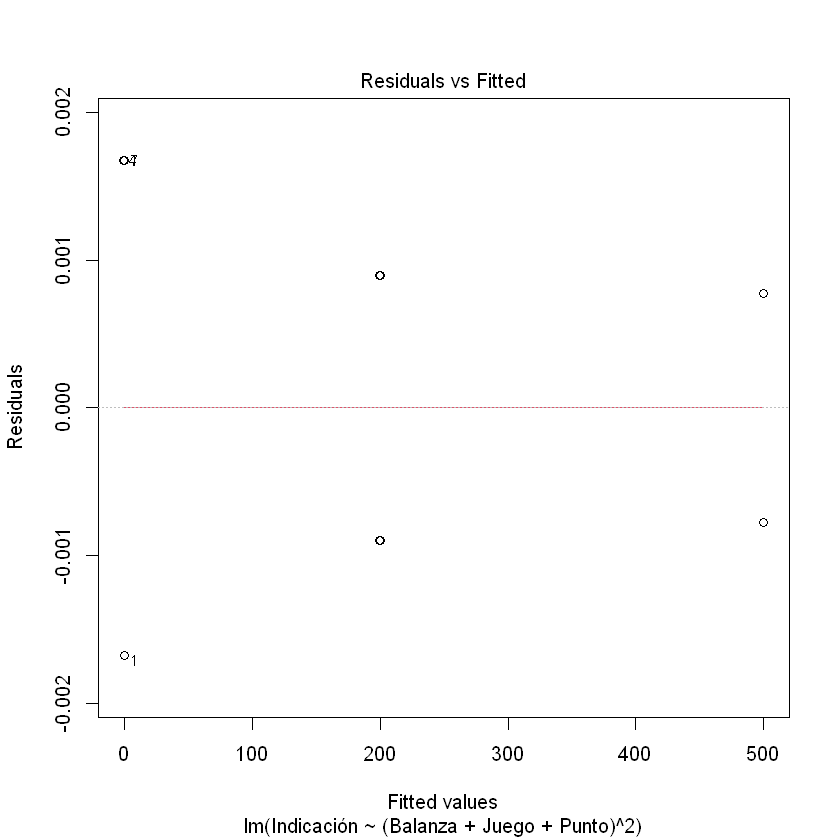

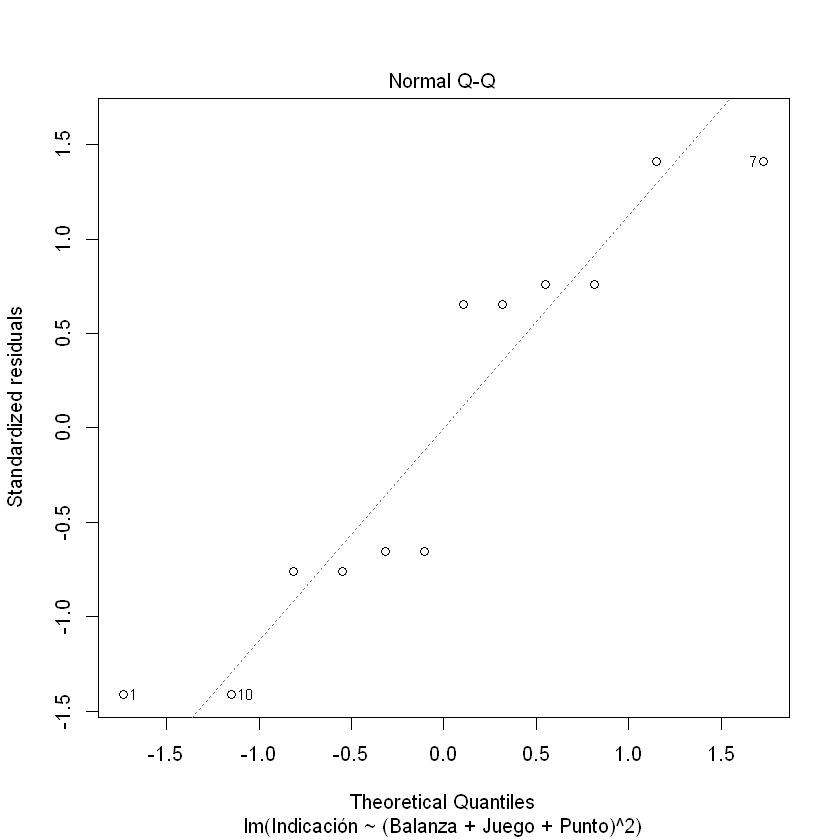

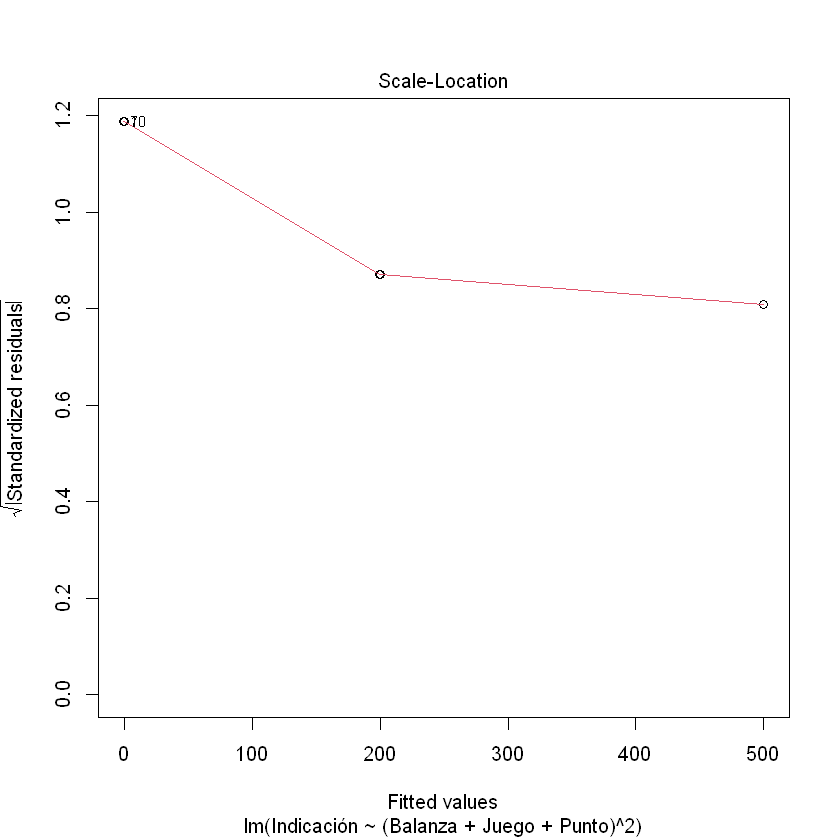

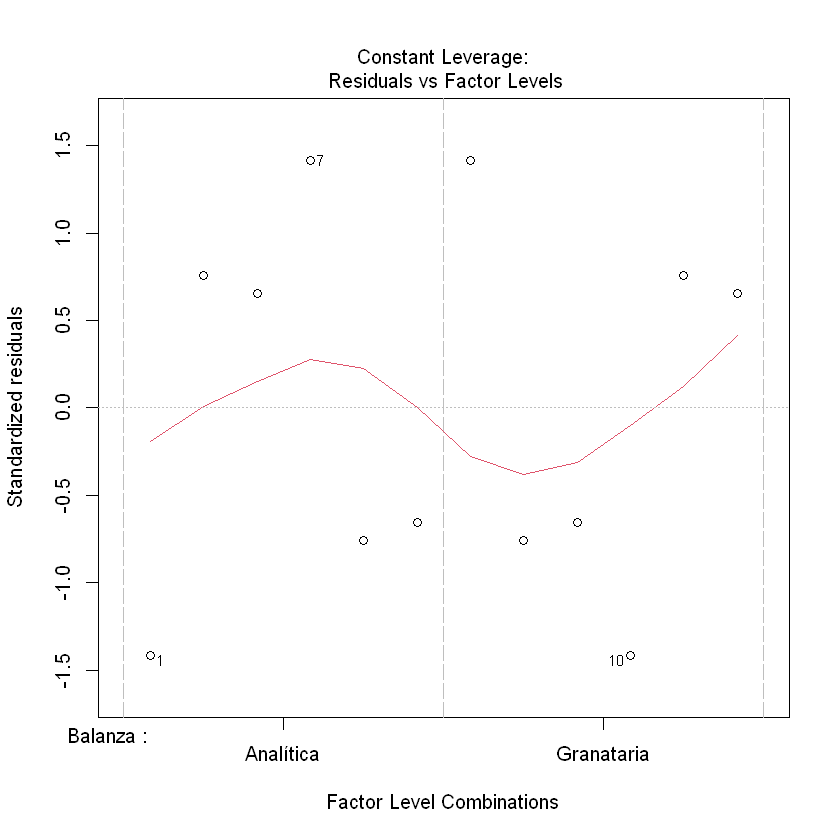

In [12]:
df.lm = lm(Indicación ~ (Balanza+Juego+Punto)**2)
anova(df.lm)
# summary(ensamble.lm)
plot(df.lm)

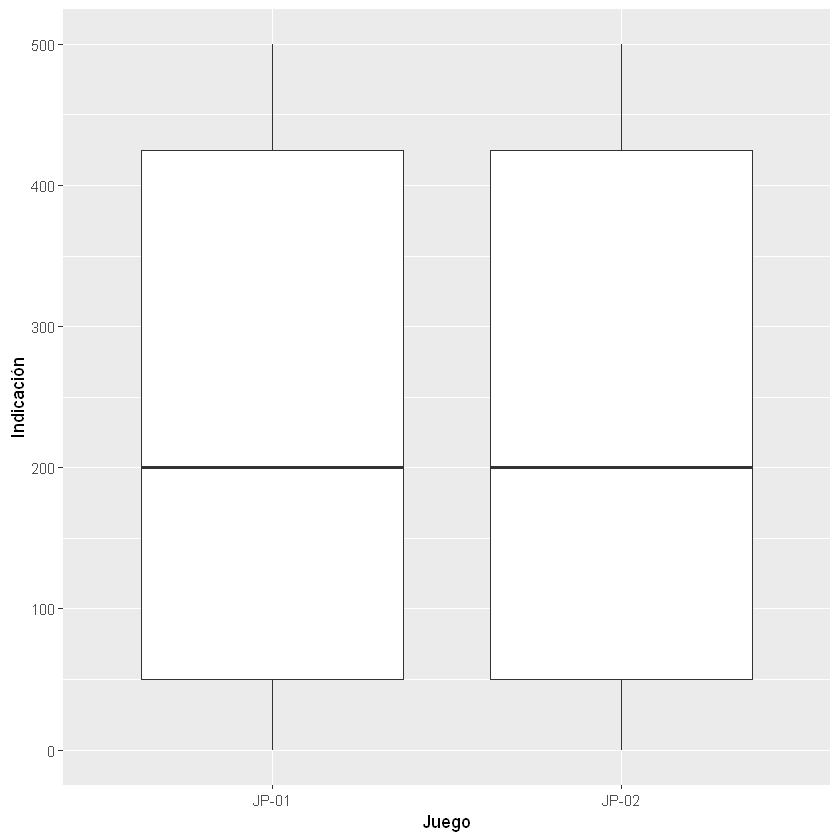

In [13]:
ggplot(df, aes(x=Juego, y=Indicación)) + geom_boxplot()